In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from numpy import mean
from skopt.utils import use_named_args
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error
import numpy as np
import pandas as pd
#
from sklearn.tree import DecisionTreeRegressor



In [2]:
dataset = pd.read_csv('./Dataset/dataset.csv')

features = ["Freq"]
targets = ["W", "L", "Lf", "Lg", "X_g","Wg"]
x = dataset[features]
y = dataset[targets]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [5]:
search_space = [Integer(1, 1000, name='max_depth'), Integer(2, 1000, name='min_samples_split')]
# search_space = [
#     Integer(1, 50, name="max_depth"),
#     Integer(2, 50, name="min_samples_split"),
#     Integer(1, 50, name="min_samples_leaf"),
#     Categorical(["auto", "sqrt", "log2", None], name="max_features"),
#     Categorical(["gini", "entropy", "log_loss"], name="criterion"),   # classifier
#     Integer(5, 200, name="max_leaf_nodes"),
#     Real(0.0, 1e-3, prior="log-uniform", name="min_impurity_decrease"),
#     Categorical(["best", "random"], name="splitter")
# ]

In [6]:
@use_named_args(search_space)
def evaluate_model(**params):
    model = DecisionTreeRegressor(max_depth=params['max_depth'], min_samples_split=params['min_samples_split'])
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    error = mean((y_test - y_pred) ** 2)  # Đánh giá theo MSE
    return error

In [7]:
result = gp_minimize(evaluate_model, search_space)

c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [634, 2] before, using random point [900, 339]
  warnings.warn(
c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [634, 2] before, using random point [803, 772]
  warnings.warn(
c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [633, 2] before, using random point [345, 578]
  warnings.warn(
c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [633, 2] before, using random point [827, 25]
  warnings.warn(
c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: 

In [8]:
best_max_depth = result.x[0]
best_min_samples_split = result.x[1]
best_model = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
best_model.fit(x_train_scaled, y_train)

DecisionTreeRegressor(max_depth=1000)

In [13]:
new_dataset = pd.read_csv('./Dataset/dataset.csv')  
new_data = new_dataset["Freq"].values.reshape(-1, 1)  
# Scaling 
new_data_scaled = scaler.transform(new_data)
# Predict
y_pred = best_model.predict(x_test_scaled)


c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: max_depth=%d, min_samples_split=%d' % (result.x[0], result.x[1]))
print("Predictions:", y_pred)


Best Accuracy: -0.560
Best Parameters: max_depth=1000, min_samples_split=2
Predictions: [[22.15465556 18.85397778 18.838       5.39395     6.36193     3.11      ]
 [77.2209     41.59573111 13.3872      4.91463     6.08846     3.11      ]
 [64.5947     37.37675556 13.3718      5.6622      6.06233     3.11      ]
 ...
 [30.62876667 22.0314     18.8307      4.99044     6.36872     3.11      ]
 [13.19683889 12.27993778 18.458       3.86766     3.81221     2.92395   ]
 [58.91179556 33.47155    13.31035     5.43812     4.98673     3.11      ]]


1254

In [14]:
from sklearn import preprocessing
def regression_report(y_true, y_pred):
    y_pred = preprocessing.normalize(y_pred)
    y_true = preprocessing.normalize(y_true)

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    explained_variance = explained_variance_score(y_true, y_pred)
    median_ae = median_absolute_error(y_true, y_pred)

    # Mean Bias Deviation (MBD)
    mbd = np.mean(y_pred - y_true)

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Symmetric Mean Absolute Percentage Error (sMAPE)
    smape = np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) * 100

    report = pd.DataFrame({
        'Metric': [
            'Mean Absolute Error (MAE)',
            'Mean Squared Error (MSE)',
            'Root Mean Squared Error (RMSE)',
            'R² Score',
            'Explained Variance Score',
            'Median Absolute Error',
            'Mean Bias Deviation (MBD)',
            'Mean Absolute Percentage Error (MAPE)',
            'Symmetric Mean Absolute Percentage Error (sMAPE)'
        ],
        'Gausians': [mae, mse, rmse, r2, explained_variance, median_ae, mbd, mape, smape]
    })

    return report

report = regression_report(y_test, y_pred)
print(report)

                                             Metric  Gausians
0                         Mean Absolute Error (MAE)  0.001682
1                          Mean Squared Error (MSE)  0.000038
2                    Root Mean Squared Error (RMSE)  0.006147
3                                          R² Score  0.993951
4                          Explained Variance Score  0.993970
5                             Median Absolute Error  0.000763
6                         Mean Bias Deviation (MBD) -0.000028
7             Mean Absolute Percentage Error (MAPE)  0.608496
8  Symmetric Mean Absolute Percentage Error (sMAPE)  0.617695


In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

In [16]:
pred_val = pd.DataFrame(y_pred)
# print(pred_val)
y_test = y_test.reset_index(drop=True)
true_val_W = y_test['W']
true_val_L = y_test['L']
true_val_Lf = y_test['Lf']

pred_val_W = pred_val[0]
pred_val_L = pred_val[1]
pred_val_Lf = pred_val[2]

# print("y_test",y_test)

# print("pred_val",pred_val)

result = pd.concat([y_test, pred_val], axis=1)

result['Err_W'] = y_test['W'] - pred_val[0]
result['Err_L'] = y_test['L'] - pred_val[1]
result['Err_Lf'] = y_test['Lf'] - pred_val[2]

print(result['Err_W'])


0      0.095911
1      0.718726
2      0.561033
3     -0.091800
4      0.000000
         ...   
204    0.000000
205   -0.285400
206    0.168933
207    0.013139
208   -0.357858
Name: Err_W, Length: 209, dtype: float64


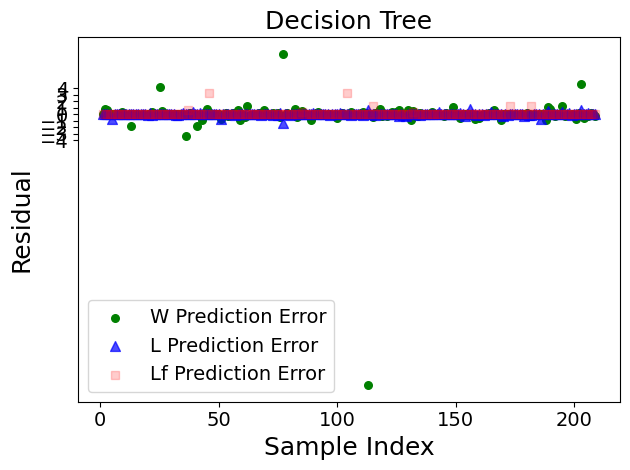

In [18]:
sample_indices = list(range(1, len(true_val_W) + 1))

plt.scatter(sample_indices, result['Err_W'], label='W Prediction Error', color='green', s=30, alpha= 1, marker='o')
plt.scatter(sample_indices, result['Err_L'], label='L Prediction Error', color='blue', s=50, alpha= 0.7, marker='^')
plt.scatter(sample_indices, result['Err_Lf'], label='Lf Prediction Error', color='red', s=40, alpha= 0.2, marker='s')


plt.xlabel('Sample Index',fontsize=18)
plt.ylabel('Residual',fontsize=18)
plt.title('Decision Tree',fontsize=18)
# plt.grid(True)
plt.legend(fontsize=14)
plt.xticks(np.arange(0, 210, 50),fontsize=14)
plt.yticks(np.arange(-4, 5, 1),fontsize=14)
# plt.xticks(sample_indices)
plt.tight_layout()
plt.show()